In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head(5)

C:\Users\clip9\AppData\Local\Temp\ipykernel_30940\755727467.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


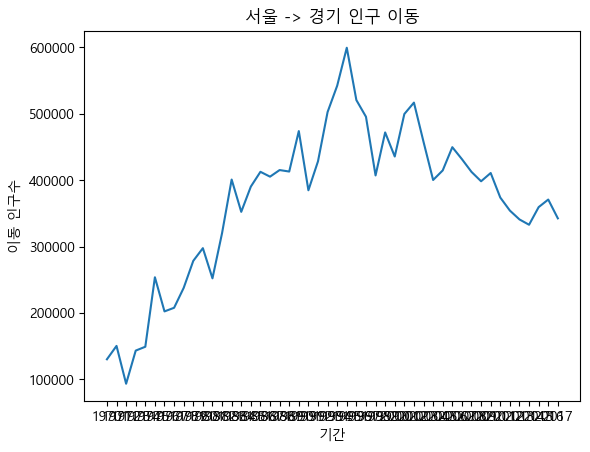

In [6]:
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

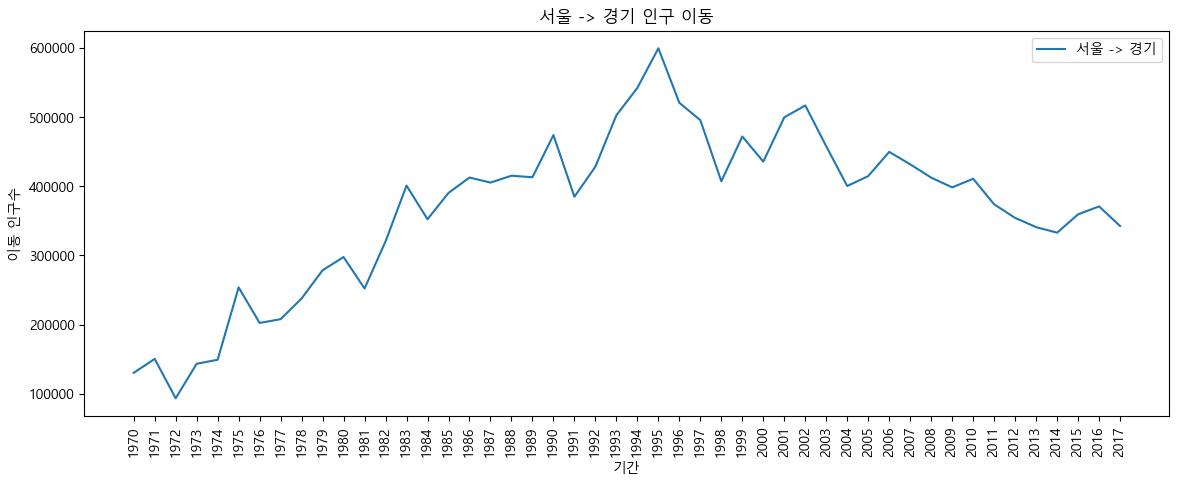

In [8]:
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sr_one = df_seoul.loc['경기도']


plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

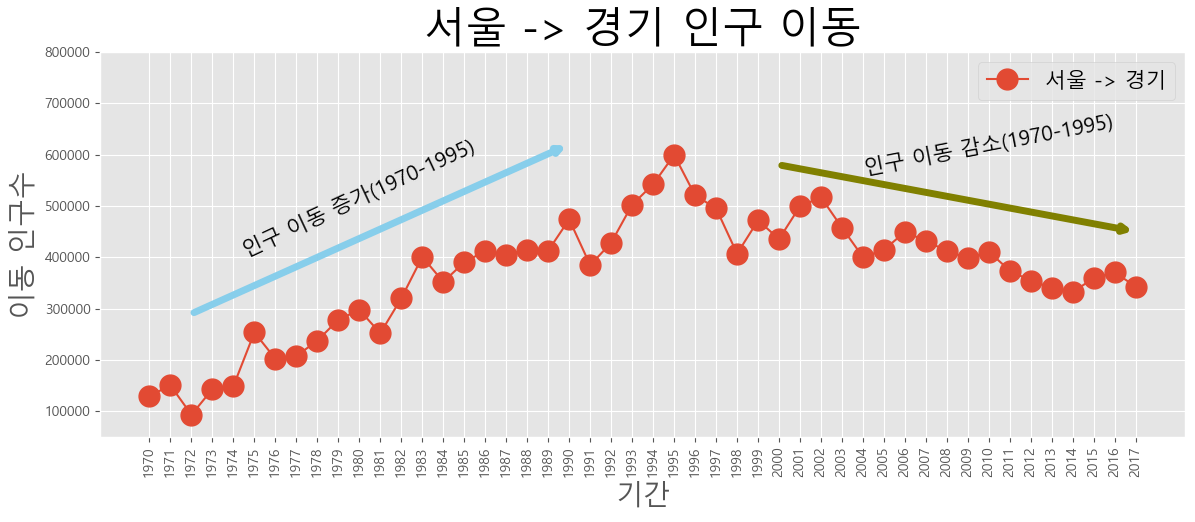

In [6]:
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')
plt.figure(figsize=(14, 5))

plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=15)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.ylim(50000, 800000)
plt.annotate('',
             xy=(20, 620000),
             xytext=(2, 290000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),
             )
plt.annotate('',
             xy=(47, 450000),
             xytext=(30, 580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),
             )
plt.annotate('인구 이동 증가(1970-1995)',
             xy=(10, 400000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize='15')
plt.annotate('인구 이동 감소(1970-1995)',
             xy=(40, 560000),
             rotation=11,
             va='baseline',
             ha='center',
             fontsize='15')
plt.show()

C:\Users\clip9\AppData\Local\Temp\ipykernel_21940\1190140656.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\clip9\AppData\Local\Temp\ipykernel_21940\1190140656.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(sr_one.index, rotation=75)


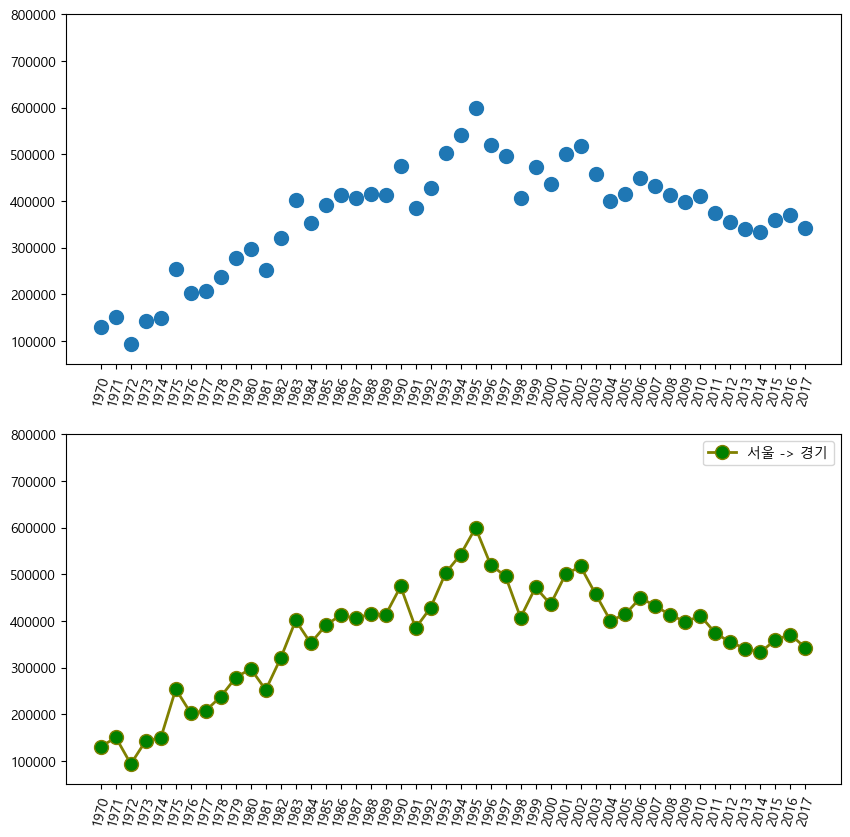

In [4]:
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
sr_one = df_seoul.loc['경기도']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')

ax2.legend(loc='best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()



C:\Users\clip9\AppData\Local\Temp\ipykernel_21940\1446992480.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sr_one.index, rotation=75)


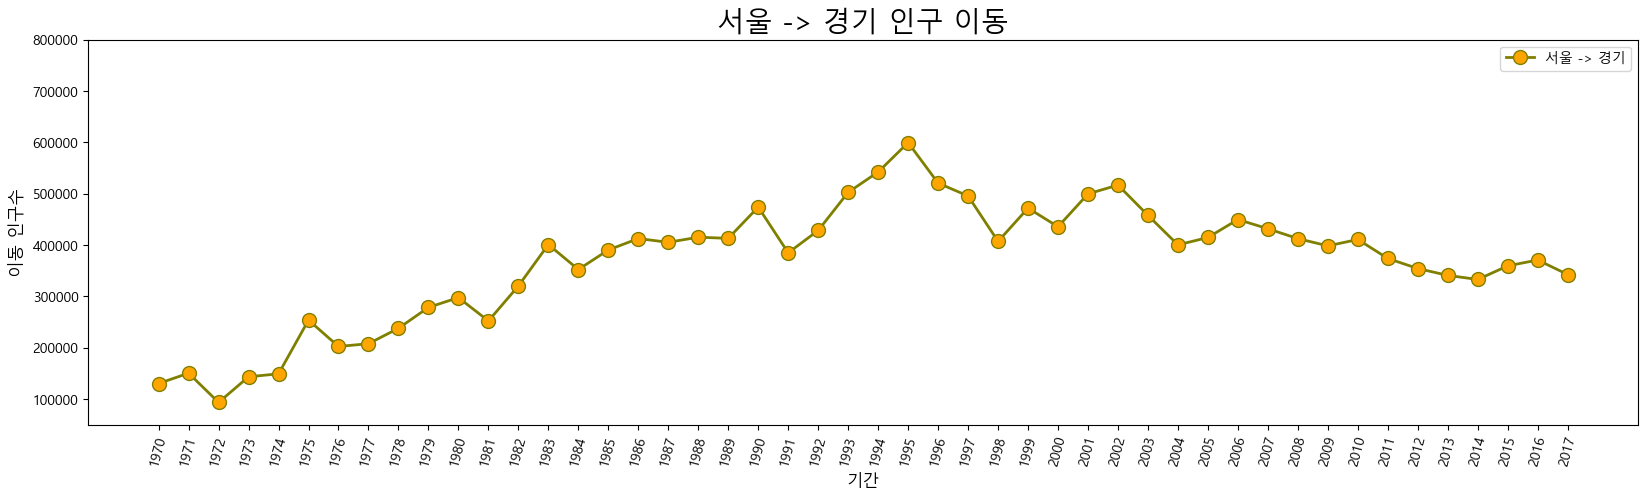

In [11]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive',
        linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

ax.set_ylim(50000, 800000)

ax.set_title('서울 -> 경기 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(sr_one.index, rotation=75)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

C:\Users\clip9\AppData\Local\Temp\ipykernel_28524\3680747610.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(col_years, rotation=90)


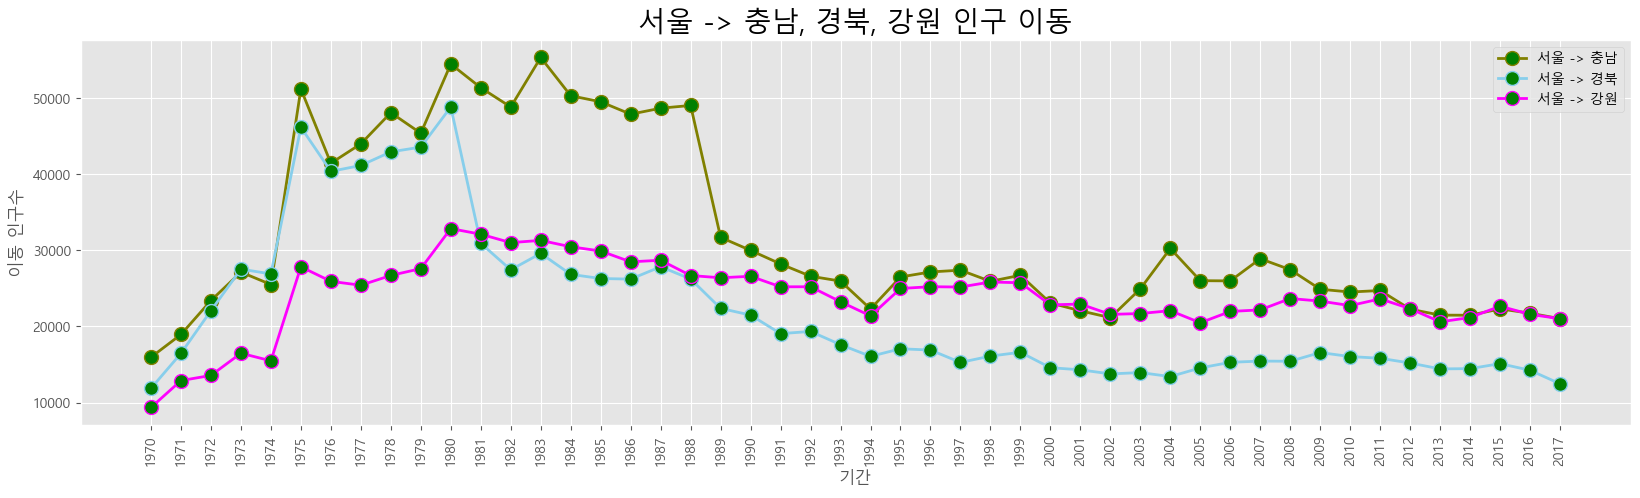

In [3]:
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='green',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='green',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()


C:\Users\clip9\AppData\Local\Temp\ipykernel_28524\1717154896.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\clip9\AppData\Local\Temp\ipykernel_28524\1717154896.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\clip9\AppData\Local\Temp\ipykernel_28524\1717154896.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\clip9\AppData\Local\Temp\ipykernel_28524\1717154896.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(col_years, rotation=90)


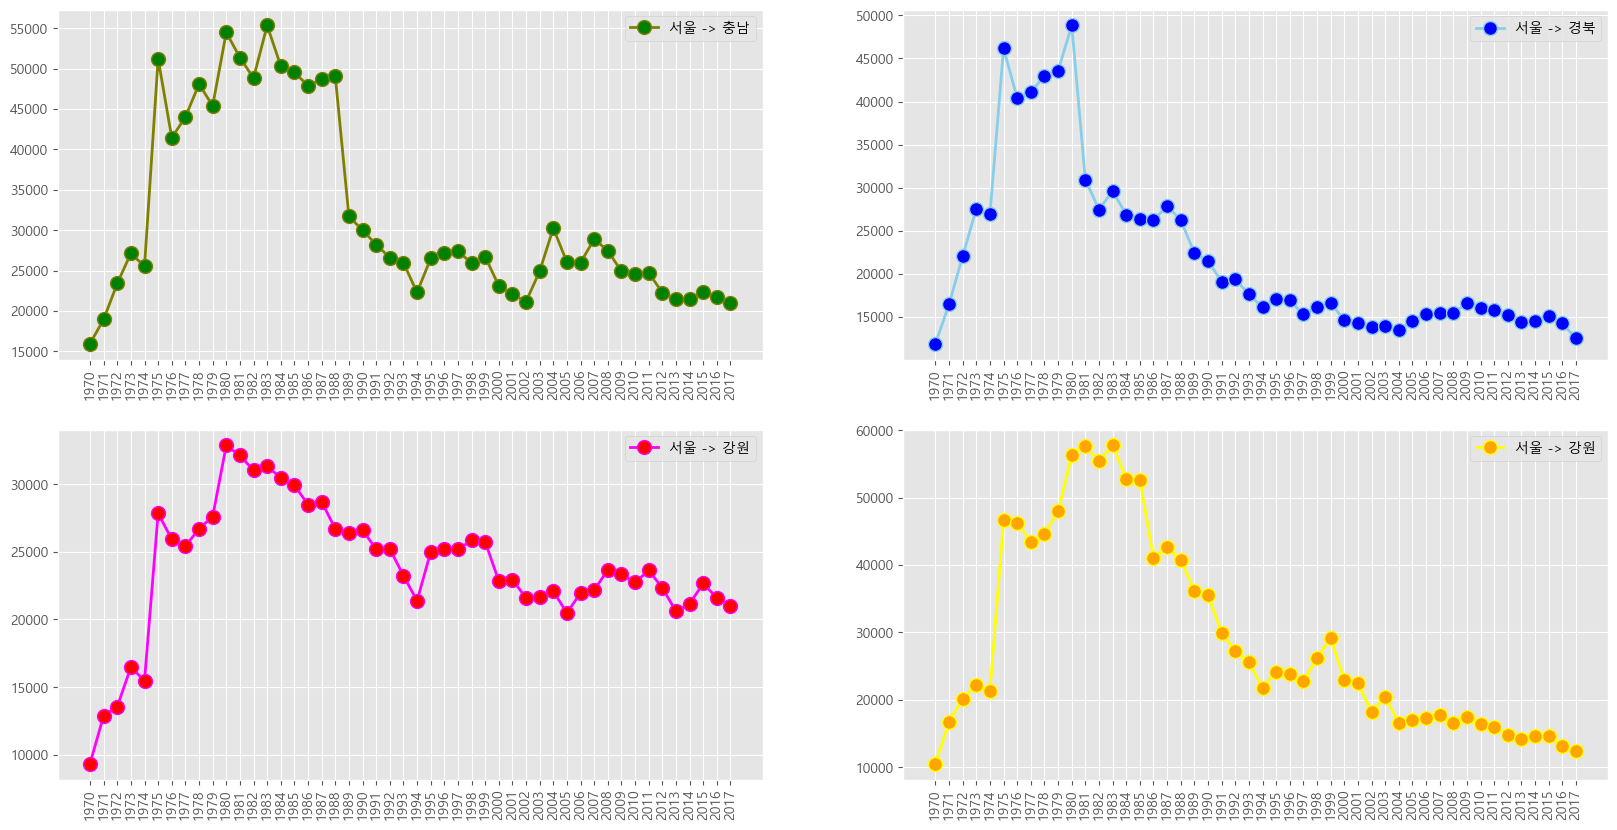

In [8]:
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_3.loc['전라남도', :], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 강원')


ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax.set_title('서울 -> 충남 인구 이동', size=15)
ax.set_title('서울 -> 경북 인구 이동', size=15)
ax.set_title('서울 -> 강원 인구 이동', size=15)
ax.set_title('서울 -> 전남 인구 이동', size=15)

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)


plt.show()


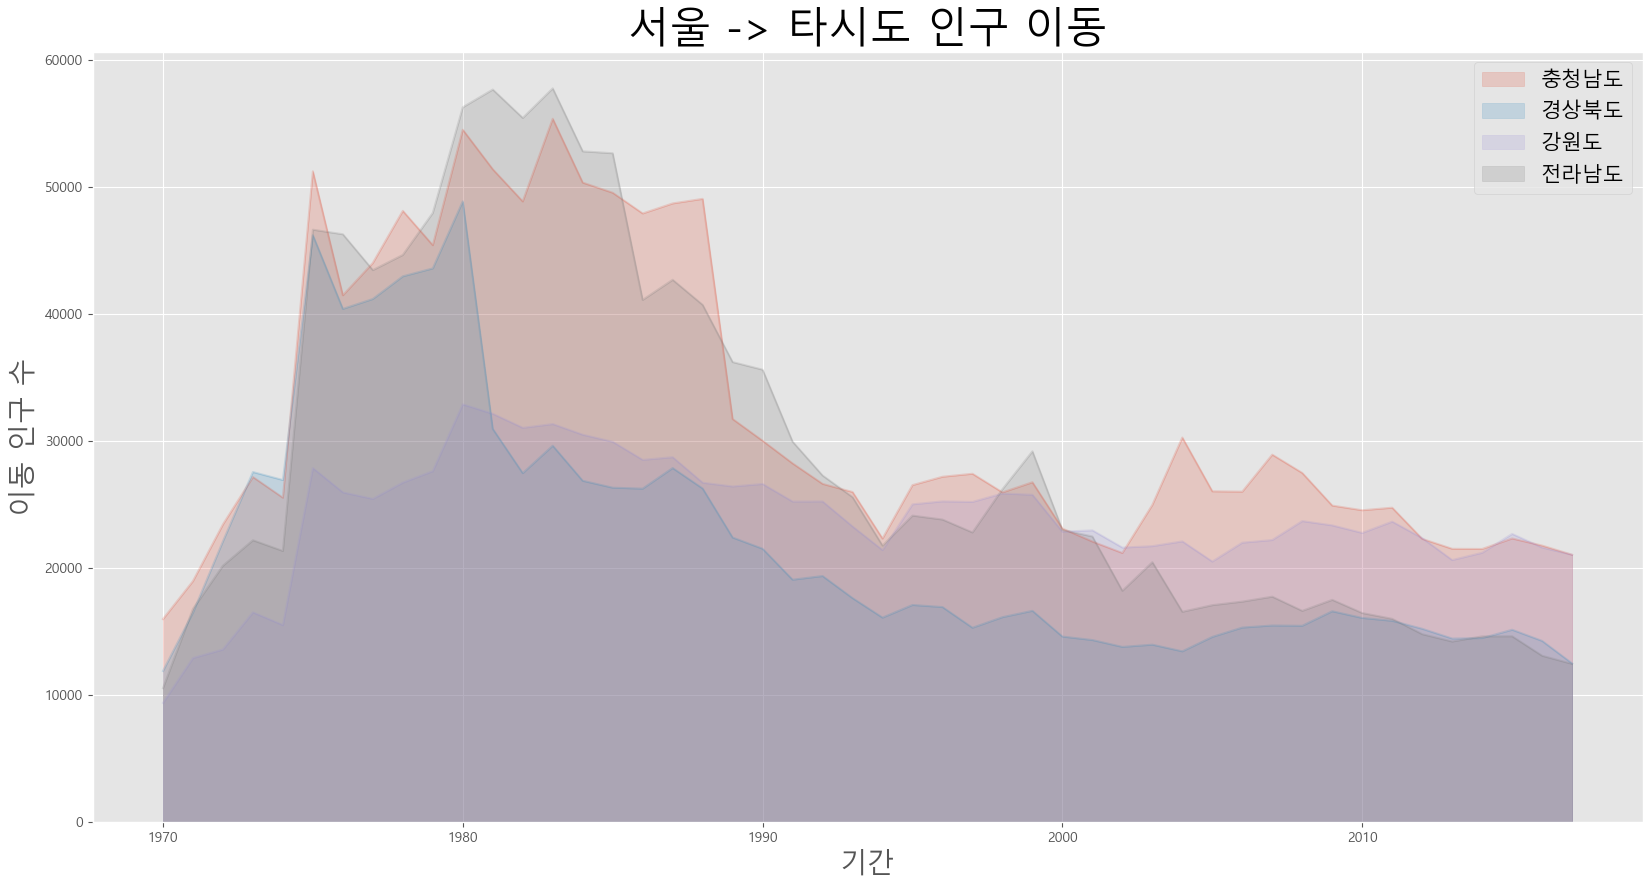

In [10]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

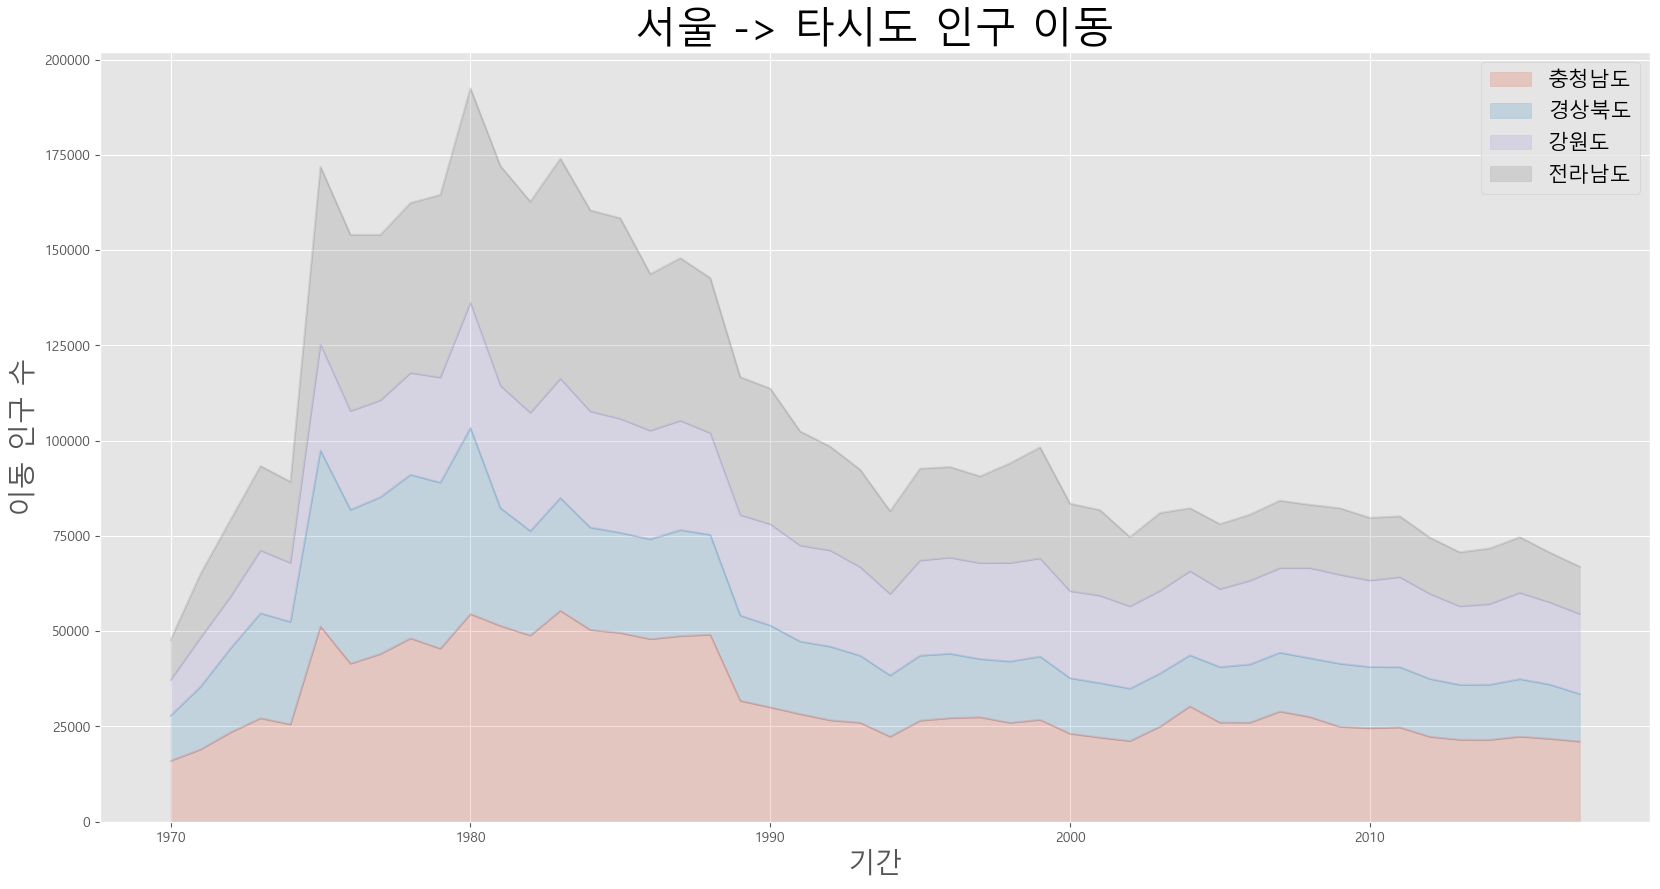

In [11]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._axes.Axes'>


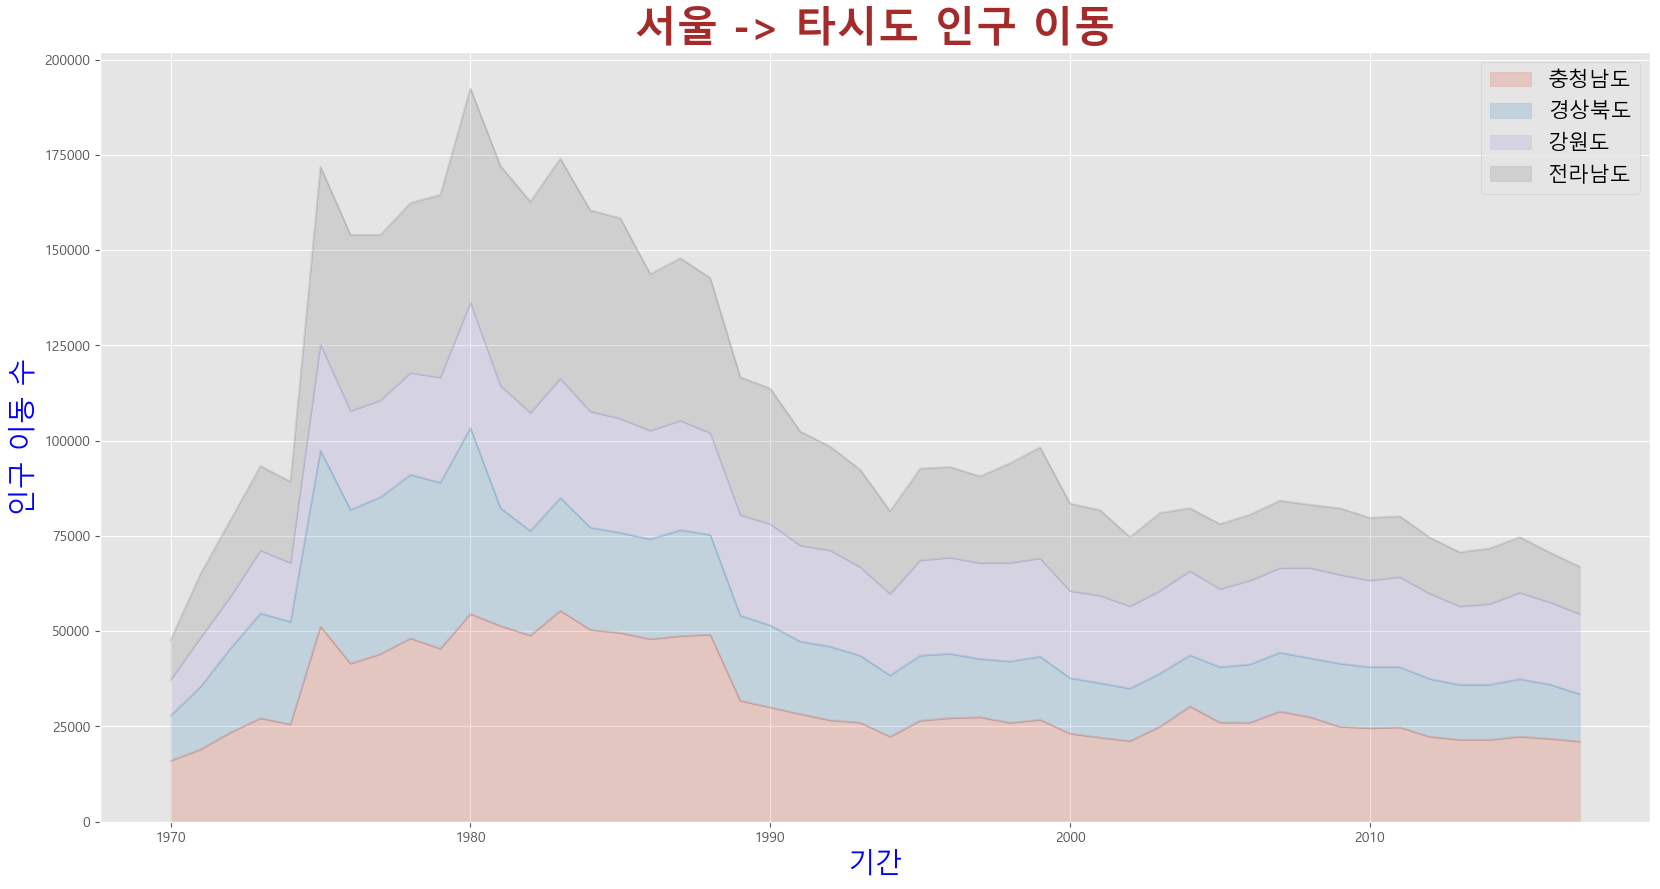

In [12]:
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('인구 이동 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

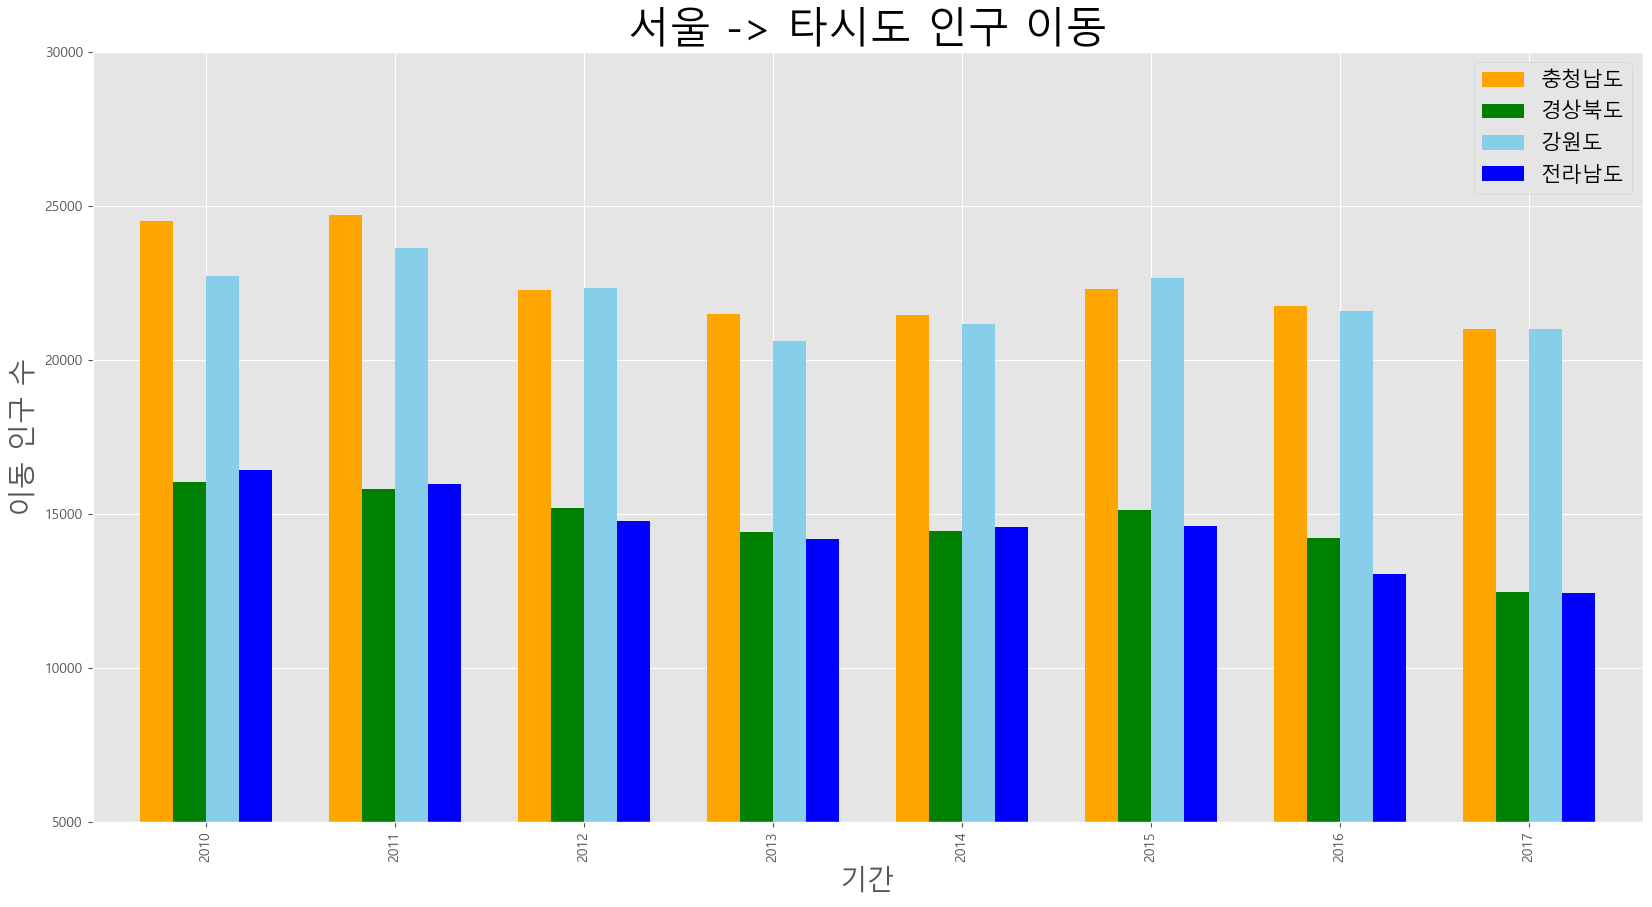

In [13]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20, 10), width=0.7, color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

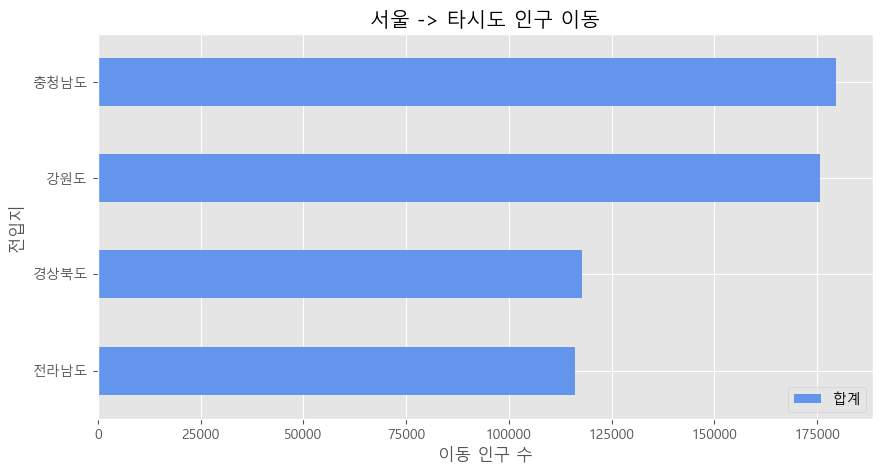

In [14]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4['합계'] = df_4.sum(axis=1)

df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
plt.style.use('ggplot')

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10 ,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()